### import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Tampilkan dataset

In [2]:
credit_customer = pd.read_csv('Credit.csv')
credit_customer

,Unnamed: 0,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,sex,residence,age,housing,cards,liable,tele,foreign
0,1,0,<DM0,6,terrible,goods/repair,1169,DM0-100,7+years,4,male,4,67,own,2,1,yes,foreign
1,2,1,DM0-200,48,poor,goods/repair,5951,DM0-100,1-7years,2,female,2,22,own,1,1,no,foreign
2,3,0,NoAccount,12,terrible,edu,2096,DM0-100,1-7years,2,male,3,49,own,1,2,no,foreign
3,4,0,<DM0,42,poor,goods/repair,7882,DM0-100,1-7years,2,male,4,45,forfree,1,2,no,foreign
4,5,1,<DM0,24,poor,newcar,4870,DM0-100,1-7years,3,male,4,53,forfree,2,2,no,foreign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,NoAccount,12,poor,goods/repair,1736,DM0-100,1-7years,3,female,4,31,own,1,1,no,foreign
996,997,0,<DM0,30,poor,usedcar,3857,DM0-100,1-7years,4,male,4,40,own,1,1,yes,foreign
997,998,0,NoAccount,12,poor,goods/repair,804,DM0-100,7+years,4,male,4,38,own,1,1,no,foreign
998,999,1,<DM0,45,poor,goods/repair,1845,DM0-100,1-7years,4,male,4,23,forfree,1,1,yes,foreign


### Drop data

In [3]:
credit_customer = credit_customer.drop(['Unnamed: 0', 'Default', 'checkingstatus1', 'duration', 'history', 'purpose', 'savings', 'employ', 'installment', 'sex', 'residence', 'housing', 'cards', 'liable', 'tele', 'foreign'], axis = 1)
credit_customer

,amount,age
0,1169,67
1,5951,22
2,2096,49
3,7882,45
4,4870,53
...,...,...
995,1736,31
996,3857,40
997,804,38
998,1845,23


### Clustering

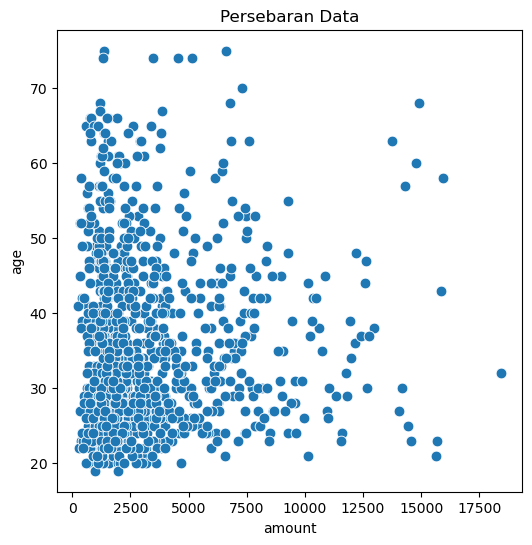

In [4]:
# persebaran data 
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'amount', y = 'age', data = credit_customer, s = 60)
plt.title('Persebaran Data')
plt.show()

### Elbow Methode

In [5]:

from sklearn.cluster import KMeans

wcss = []
for i in range (1,11): 
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(credit_customer)
    wcss.append(kmModel.inertia_)

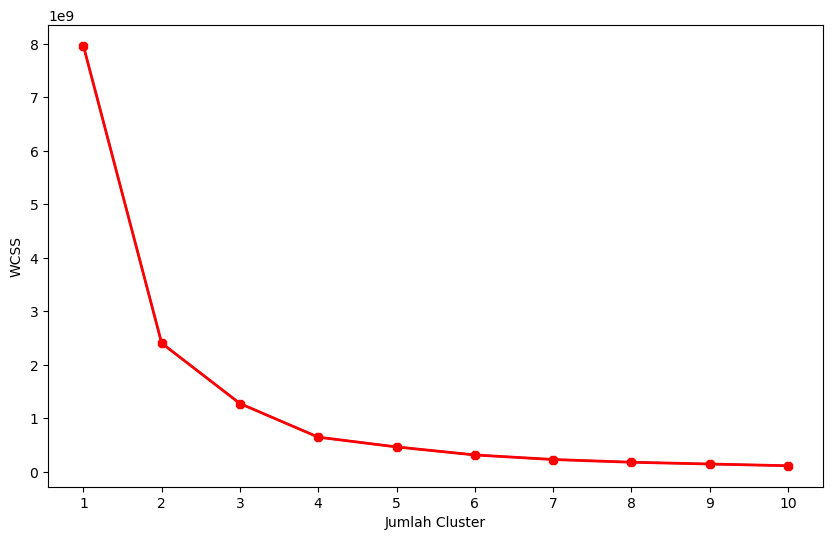

In [6]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [7]:
# model dengan 5 cluster

kmModelFix = KMeans(n_clusters = 3, n_init = 10) # n_init = 10 / n_init = 'auto'
kmModelFix.fit(credit_customer)

# memprediksi hasil
hasil_prediksi = kmModelFix.predict(credit_customer)
hasil_prediksi

array([1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1,

In [8]:
credit_customer['Label'] = hasil_prediksi
credit_customer.head()

,amount,age,Label
0,1169,67,1
1,5951,22,0
2,2096,49,1
3,7882,45,0
4,4870,53,0


In [9]:
credit_customer.to_csv("a.csv", index=False)

C:\Users\angel\AppData\Local\Temp\ipykernel_68772\2369252430.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x = 'amount' , y = 'age', hue = 'Label',


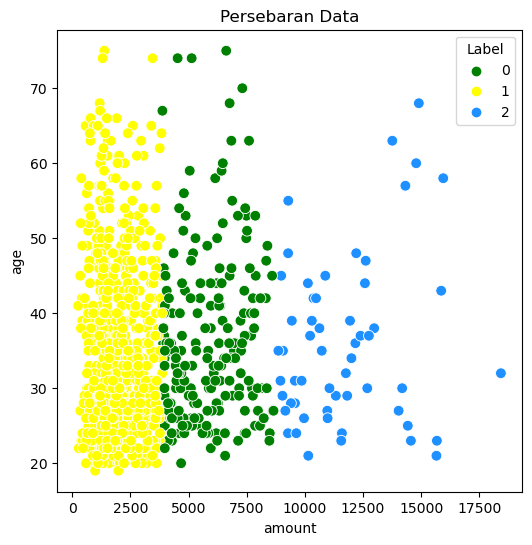

In [13]:
# persebaran data beserta labelnya 

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'amount' , y = 'age', hue = 'Label', 
palette = ['green','yellow', 'dodgerblue'], legend = 'full', data = credit_customer,
s = 60) 
plt.title('Persebaran Data')
plt.show()